### Business Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Business Goal

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Step 1: Import panda Libraries and Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#import pandas_profiling as pp
#from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')



In [2]:
telecom_df = pd.read_csv('telecom_churn_data.csv')
pd.set_option('display.max_columns', None)
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

#### Step 2: Inspect Data

In [3]:
telecom_df.shape

(99999, 226)

In [4]:
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

#### Step 3: Handling missing values 

In [5]:
def find_null(val):
    return (val.isnull().sum()*100/len(val)).sort_values(ascending = False)

In [6]:
## missing values for Usage-based churn recharge data and recharge amount 
rech_cols= telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data')]
print (rech_cols)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [7]:
find_null(telecom_df[rech_cols])

total_rech_data_6           74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
date_of_last_rech_data_6    74.846748
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_9    74.077741
max_rech_data_9             74.077741
total_rech_data_9           74.077741
av_rech_amt_data_9          74.077741
date_of_last_rech_data_8    73.660737
total_rech_data_8           73.660737
max_rech_data_8             73.660737
av_rech_amt_data_8          73.660737
total_rech_amt_7             0.000000
max_rech_amt_9               0.000000
max_rech_amt_8               0.000000
max_rech_amt_7               0.000000
max_rech_amt_6               0.000000
total_rech_amt_9             0.000000
total_rech_amt_8             0.000000
total_rech_amt_6             0.000000
dtype: float64

In [8]:
## looking at date of last recharge made in given period date_of_last_rech_data_
## so total_rech_amt_ and max_rech_data_ columns also will have missing data, which make sense.
## Hence imputing with 0 for these attributes
telecom_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)
len(telecom_df)

99999

In [9]:
#for i in range(len(telecom_df)):
# month 6
telecom_df['total_rech_data_6'] = telecom_df['total_rech_data_6'].replace(np.NaN,0.0)
telecom_df['max_rech_data_6'] = telecom_df['max_rech_data_6'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_6'] = telecom_df['max_rech_data_6'].replace(np.NaN,0.0)

#     '''if pd.isnull((telecom_df['total_rech_data_6'][i]) and (telecom_df['max_rech_data_6'][i])):
#         if pd.isnull(telecom_df['date_of_last_rech_data_6'][i]):
#             telecom_df['total_rech_data_6'][i]=0
#             telecom_df['max_rech_data_6'][i]=0'''

# month 7
telecom_df['total_rech_data_7'] = telecom_df['total_rech_data_7'].replace(np.NaN,0.0)
telecom_df['max_rech_data_7'] = telecom_df['max_rech_data_7'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_7'] = telecom_df['max_rech_data_7'].replace(np.NaN,0.0)

# month 8
telecom_df['total_rech_data_8'] = telecom_df['total_rech_data_8'].replace(np.NaN,0.0)
telecom_df['max_rech_data_8'] = telecom_df['max_rech_data_8'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_8'] = telecom_df['max_rech_data_8'].replace(np.NaN,0.0)

# month 9  
telecom_df['total_rech_data_9'] = telecom_df['total_rech_data_9'].replace(np.NaN,0.0)
telecom_df['max_rech_data_9'] = telecom_df['max_rech_data_9'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_9'] = telecom_df['max_rech_data_9'].replace(np.NaN,0.0)

In [10]:
find_null(telecom_df[rech_cols])

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
total_rech_amt_6             0.000000
total_rech_data_8            0.000000
av_rech_amt_data_8           0.000000
av_rech_amt_data_7           0.000000
av_rech_amt_data_6           0.000000
max_rech_data_9              0.000000
max_rech_data_8              0.000000
max_rech_data_7              0.000000
max_rech_data_6              0.000000
total_rech_data_9            0.000000
total_rech_data_6            0.000000
total_rech_data_7            0.000000
total_rech_amt_7             0.000000
max_rech_amt_9               0.000000
max_rech_amt_8               0.000000
max_rech_amt_7               0.000000
max_rech_amt_6               0.000000
total_rech_amt_9             0.000000
total_rech_amt_8             0.000000
av_rech_amt_data_9           0.000000
dtype: float64

In [11]:
find_null(telecom_df).head(60)

fb_user_6                   74.846748
night_pck_user_6            74.846748
count_rech_3g_6             74.846748
arpu_2g_6                   74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
fb_user_7                   74.428744
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
date_of_last_rech_data_7    74.428744
count_rech_2g_7             74.428744
count_rech_3g_7             74.428744
fb_user_9                   74.077741
date_of_last_rech_data_9    74.077741
count_rech_3g_9             74.077741
count_rech_2g_9             74.077741
night_pck_user_9            74.077741
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
night_pck_user_8            73.660737
fb_user_8                   73.660737
date_of_last_rech_data_8    73.660737
count_rech_3g_8             73.660737
arpu_2g_8                   73.660737
arpu_3g_8   

In [12]:
## checking mising values for below attributes in dataset and dropping these attributes
## count_reach_2g_* and count_reach_3g_* arpu_2g_* and arpu_3g_* for months 6,7,8 & 9 
cols_drop=['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9','arpu_3g_9','arpu_3g_8','arpu_3g_7','arpu_3g_6','arpu_2g_9','arpu_2g_8','arpu_2g_7','arpu_2g_6']
telecom_df.drop(cols_drop, axis=1, inplace=True)

In [13]:
find_null(telecom_df).head(60)

fb_user_6                   74.846748
night_pck_user_6            74.846748
date_of_last_rech_data_6    74.846748
night_pck_user_7            74.428744
fb_user_7                   74.428744
date_of_last_rech_data_7    74.428744
fb_user_9                   74.077741
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
night_pck_user_8            73.660737
date_of_last_rech_data_8    73.660737
fb_user_8                   73.660737
std_ic_t2m_mou_9             7.745077
std_ic_t2o_mou_9             7.745077
std_og_t2t_mou_9             7.745077
loc_og_mou_9                 7.745077
spl_ic_mou_9                 7.745077
std_ic_t2t_mou_9             7.745077
loc_ic_mou_9                 7.745077
loc_og_t2c_mou_9             7.745077
isd_og_mou_9                 7.745077
loc_og_t2f_mou_9             7.745077
std_og_t2m_mou_9             7.745077
std_ic_t2f_mou_9             7.745077
loc_og_t2m_mou_9             7.745077
loc_ic_t2f_mou_9             7.745077
std_og_t2f_m

#### Step 4: EDA 

In [14]:
## The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
## Good Phase: In this phase, the customer is happy with the service and behaves as usual, Month 6 & 7
## Action Phase: In this phase customer usually shows different behaviour than the ‘good’ months and important to identify high-churn risk customers. Month 8
## Chrun Phase: In this phase, the customer is said to have churned. Month 9

In [15]:
## Finding High value customers those who have recharged with an amt more than 75 percentile in Good Phase 
telecom_df['total_avg_rech_amnt_GoodPhase'] = (telecom_df.total_rech_amt_6 + telecom_df.total_rech_data_6 
                                               + telecom_df.total_rech_amt_7 + telecom_df.total_rech_data_7)/2

In [16]:
high_value_cust_filter = telecom_df.total_avg_rech_amnt_GoodPhase.quantile(0.75)
print (high_value_cust_filter)

420.0


In [17]:
## 75 percentile of June and July month ave recharge amt 420

In [18]:
telecom_df_high_value_cust=telecom_df[telecom_df['total_avg_rech_amnt_GoodPhase'] > high_value_cust_filter]
telecom_df_high_value_cust.shape

(24925, 211)

In [19]:
## Tag Churners based on customers who have not made any calls, not used mobile internet in churn phase 


In [20]:
high_value_cust_filter_9=['vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9', 'total_og_mou_9']
telecom_df_high_value_cust['churn']=0
churn_month_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
is_churned = (telecom_df_high_value_cust.total_ic_mou_9 == 0) & \
             (telecom_df_high_value_cust.total_og_mou_9 == 0) & \
             (telecom_df_high_value_cust.vol_2g_mb_9 ==0) & \
             (telecom_df_high_value_cust.vol_3g_mb_9 ==0)
telecom_df_high_value_cust.loc[is_churned,'churn']=1

In [21]:
## Find % of churned customers 
telecom_df_high_value_cust.churn.sum()/len(telecom_df_high_value_cust)*100

8.714142427281846

In [22]:
## remove attributes of the churn phase 
telecom_df_high_value_cust.drop(churn_month_cols,axis=1,inplace=True)

In [23]:
telecom_df_high_value_cust.shape

(24925, 208)

In [24]:
## Defining Churn variable for customers ho have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time

churn_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_df[churn_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  99999 non-null  float64
 1   total_og_mou_9  99999 non-null  float64
 2   vol_2g_mb_9     99999 non-null  float64
 3   vol_3g_mb_9     99999 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [25]:
## Churn Variable initialization 
telecom_df['churn']=0
telecom_df['churn'] = np.where(telecom_df[churn_cols].sum(axis=1) == 0, 1, 0)
telecom_df['churn'].head(50)
telecom_df.head(50)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_avg_rech_amnt_GoodPhase,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,08/08/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,08/08/2014,NaN,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,25

0    89.808898
1    10.191102
Name: churn, dtype: float64


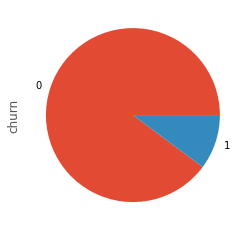

In [26]:
print((telecom_df['churn'].value_counts()/len(telecom_df))*100)
((telecom_df['churn'].value_counts()/len(telecom_df))*100).plot(kind="pie")
plt.show()

In [27]:
## 90% customers don't churn 
## 10% customers churn 

In [28]:
## columns with suffix _9 are related to target variable "Churn"
## find all churn phase columns and drop them 
churn_phase_cols = [col for col in telecom_df.columns if '_9' in col]
telecom_df.drop(churn_phase_cols, axis=1, inplace=True)
telecom_df.shape

(99999, 162)

In [29]:
## Check collinearrity of independent variables and their dependency 
telecom_df_corr = telecom_df.corr()
telecom_df_corr.loc[:,:] = np.tril(telecom_df_corr, k=-1)
telecom_df_corr = telecom_df_corr.stack()
telecom_df_corr
telecom_df_corr[(telecom_df_corr > 0.80) | (telecom_df_corr < -0.80)].sort_values(ascending=False)

av_rech_amt_data_6             max_rech_data_6      1.000000
av_rech_amt_data_8             max_rech_data_8      1.000000
av_rech_amt_data_7             max_rech_data_7      1.000000
total_rech_amt_8               arpu_8               0.955952
total_rech_amt_6               arpu_6               0.953017
total_rech_amt_7               arpu_7               0.951995
isd_og_mou_8                   isd_og_mou_6         0.942461
                               isd_og_mou_7         0.941586
isd_og_mou_7                   isd_og_mou_6         0.931130
total_avg_rech_amnt_GoodPhase  total_rech_amt_7     0.922105
                               arpu_7               0.919143
                               total_rech_amt_6     0.917883
sachet_2g_7                    total_rech_data_7    0.908887
sachet_2g_8                    total_rech_data_8    0.908772
sachet_2g_6                    total_rech_data_6    0.907062
total_avg_rech_amnt_GoodPhase  arpu_6               0.904119
total_ic_mou_6          

In [30]:
## Dropping highly correlated independent variables having collinearity of >=85%  
corr_col_to_drop=['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                 'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7','total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8']

telecom_df.drop(corr_col_to_drop, axis=1, inplace=True)

In [31]:
telecom_df.shape

(99999, 144)

In [32]:
## check unique 1 value and drop these fields 
data_col_cardinalities=pd.DataFrame(telecom_df.nunique())
data_col_cardinalities=data_col_cardinalities.reset_index()
data_col_cardinalities.columns=['col_name', 'unique_val']
columns_all_zeros=data_col_cardinalities[data_col_cardinalities['unique_val'] == 1]
columns_all_zeros

,col_name,unique_val
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
42,std_og_t2c_mou_6,1
43,std_og_t2c_mou_7,1
44,std_og_t2c_mou_8,1


In [33]:
telecom_df.drop(columns=columns_all_zeros['col_name'], axis=1, inplace=True)

In [34]:
telecom_df.shape

(99999, 131)

In [35]:
#### Derive new variables from AON 
## Age on network (aon) - number of days the customer is using the operator T network

In [36]:
telecom_df['tenure'] = (telecom_df['aon']/30).round(0)
## Droping original column 'aon'
telecom_df.drop('aon',axis=1, inplace=True)

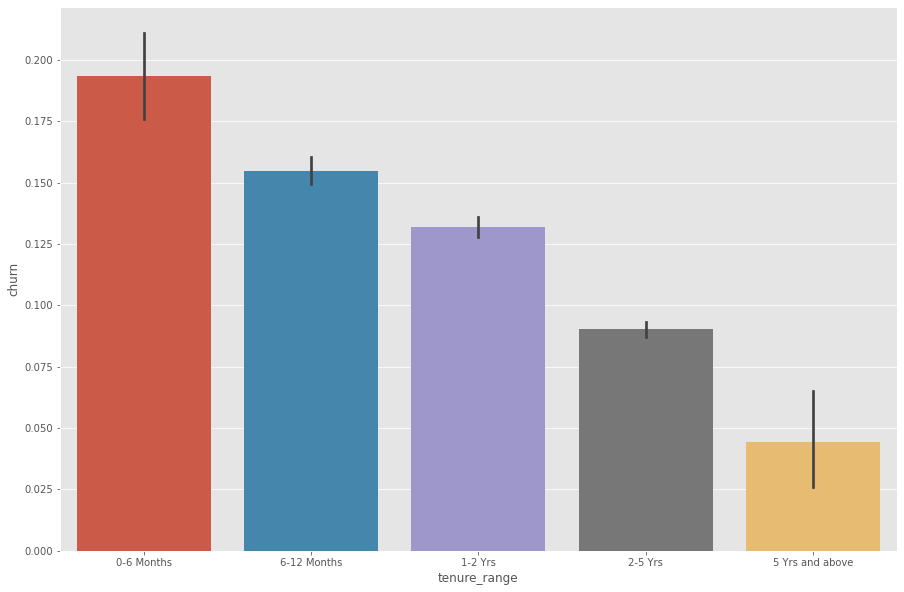

In [37]:
## plotting bar graph for customers tenure in network 
bin_range = [0, 6, 12, 24, 60, 61]
bin_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_df['tenure_range'] = pd.cut(telecom_df['tenure'], bin_range, labels=bin_label)
plt.figure(figsize=[15,10])
sns.barplot(x='tenure_range',y='churn', data=telecom_df)
plt.show()

In [38]:
## Analysis most of churn happens 1st 6 months and slowly decreases over period of time 

#### Deriving new features based on Average revenue per user and recharge done 

In [39]:
telecom_df["avg_arpu_6_7"]= (telecom_df['arpu_6']+telecom_df['arpu_7'])/2
telecom_df['avg_arpu_6_7'].head()

0    206.1005
1    194.5605
2    178.3740
3    236.2200
4    285.7560
Name: avg_arpu_6_7, dtype: float64

In [40]:
## dropping orginal col avg_arpu_
telecom_df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


In [41]:
## customers done recharge on pre-paid model assign 1 if yes else 0 for no-recharge

In [42]:
telecom_df['rech_6']=telecom_df.date_of_last_rech_6.apply(lambda x: 1 if x !=0 else 0).apply(int)
telecom_df['rech_7']=telecom_df.date_of_last_rech_7.apply(lambda x: 1 if x !=0 else 0).apply(int)
telecom_df['rech_8']=telecom_df.date_of_last_rech_8.apply(lambda x: 1 if x !=0 else 0).apply(int)
telecom_df.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_avg_rech_amnt_GoodPhase,churn,tenure,tenure_range,avg_arpu_6_7,rech_6,rech_7,rech_8
0,7000842753,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,252,252,252,6/21/2014,7/16/2014,08/08/2014,252,252,252,6/21/2014,7/16/2014,08/08/2014,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,30.4,0.0,101.20,3.58,308.0,1,32.0,2-5 Yrs,206.1005,1,1,1
1,7001865778,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,44,154,65,6/29/2014,7/31/2014,8/28/2014,44,23,30,NaN,7/25/2014,08/10/2014,2.0,0.0,154.0,25.0,25.0,0.00,108.07,365.47,0.00,0.00,0.00,NaN,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,0.0,0.0,0.00,0.00,229.5,0,34.0,2-5 Yrs,194.5605,1,1,1
2,7001625959,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.41,67.66,41.81,1.48,14.76,22.83,47.64,108.68,120.94,0.0,46.56,236.84,96.84,0.45,0.0,0.0,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,0.21,0.0,0.0,0.00,0.85,0.0,0.93,3.14,0.0,5,4,2,86,200,86,6/17/2014,7/24/2014,8/14/2014,0,200,86,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0,4.17,0.00,241.5,0,37.0,2-5 Yrs,178.3740,1,1,1
3,7001204172,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.0,54.86

In [43]:
drop_columns=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

telecom_df.drop(columns=drop_columns, axis=1, inplace=True)

In [44]:
telecom_df.shape

(99999, 131)

#### Checking correlation between target variable (Churn) with other independent variables in telecom dataset 

Text(0.5, 1.0, 'Features Correlating with Churn variable')

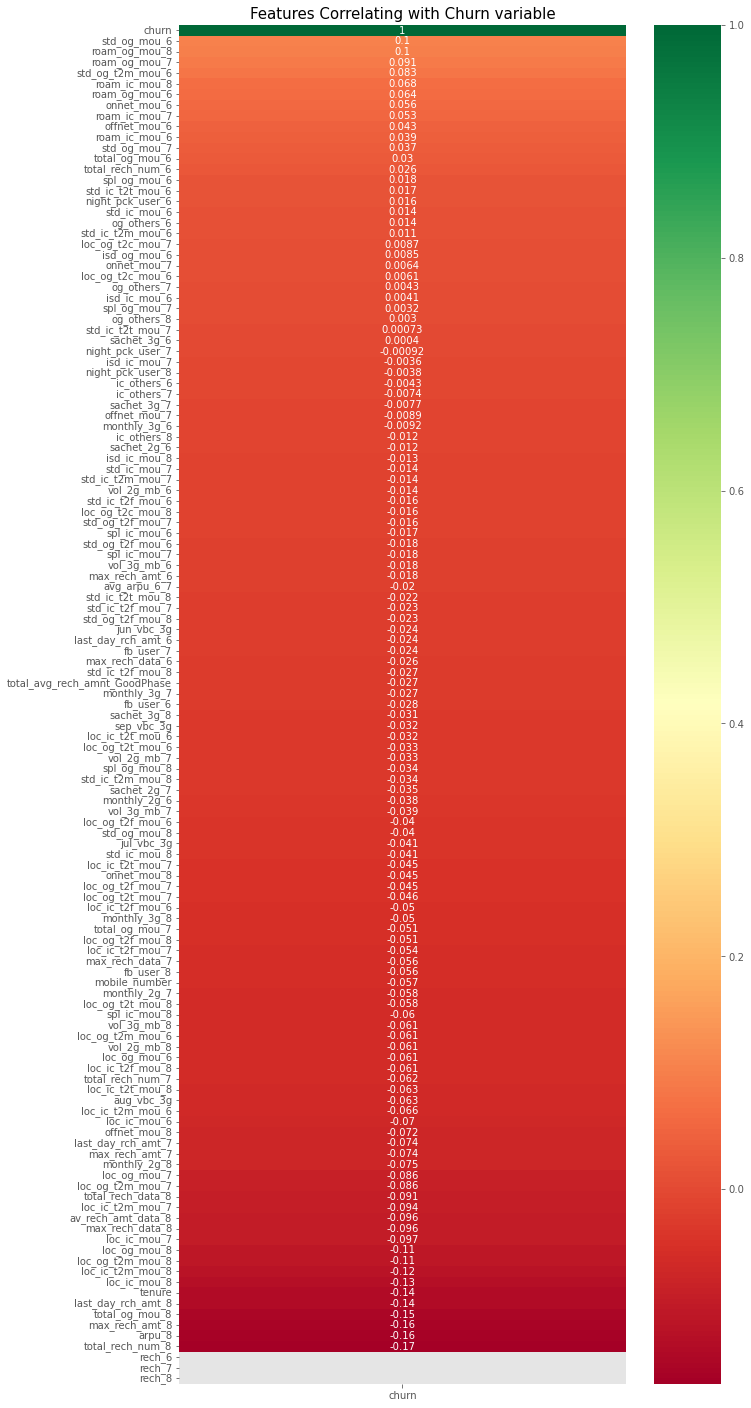

In [45]:
plt.figure(figsize=(10,25))
hm_churn = sns.heatmap(telecom_df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='RdYlGn')
hm_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [46]:
## Outgoing roaming calls and ave outgoing calls having positive correlation 
## recharge amt in 8th month and ave revenue_* having negative correlation

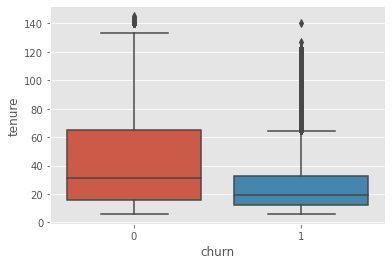

In [47]:
sns.boxplot(x = telecom_df.churn, y = telecom_df.tenure)
plt.show()

In [48]:
## Teneure customer less churn 

#### Building Model to predict customers churn rate 

#### Logistic Regression using PCA

In [61]:
# Assign Feature Variables to X and Target Variable to y 
X = telecom_df.copy()
X.drop('churn', axis=1, inplace=True)
X = scaler.fit_transform(X)
#X = telecom_df.drop(['churn'],axis=1)
#y = telecom_df['churn']

ValueError: could not convert string to float: '6/21/2014'

In [50]:
# Split Data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)
print(X_train.shape)
print(X_test.shape)

(69999, 130)
(30000, 130)


In [51]:
num_col = telecom_df.select_dtypes(include = ['int64','float64']).columns.tolist()
print(num_col)

['mobile_number', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'l

In [62]:
## Feature Scaling data 
scaler = StandardScaler()
X_train[num_col]=scaler.fit_transform(X_train[num_col])
#X=scaler.fit_transform(X[num_col)
#X.head()

KeyError: "['churn'] not in index"

In [57]:
pca = PCA(random_state=42)

In [59]:
pca.fit(X)

ValueError: could not convert string to float: '6/21/2014'

In [ ]:
X = scaler.fit_transform(X)

In [ ]:

lr1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
lr1.fit().summary()